# Dimensionality reduction
- transform data to capture the most important information in the features
- [Example](https://dimensionality-reduction-293e465c2a3443e8941b016d.vercel.app/)
- Reduces noise

# PCA
- decompose data into orthogonal vectors along the directions of maximum variance
- Like with K-Means, choose number of components
- [Example](https://setosa.io/ev/principal-component-analysis/)


## PCA in sklearn
### Data: MNIST
- famous benchmark dataset
- 28x28 images of handwritten digits

![mnist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


In [1]:
# Data, MNIST intro
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets
from sklearn import manifold

digits = datasets.load_digits()

# Examine the dataset
print(digits.data)
print(digits.target)

X = digits.data
y = digits.target

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


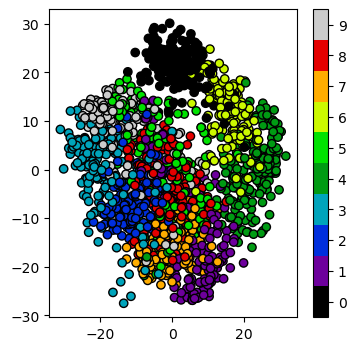

In [2]:
# PCA

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

fig = plt.figure(1, figsize=(4, 4))
plt.clf()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.nipy_spectral, 
        edgecolor='k',label=y)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# plt.savefig("pca.svg")
plt.show()


## PCA: conclusions
- Plus: cheap
- Minus: linear

# t-SNE
- models local neighborhood
- finds mapping in lower-dimensional space that preserves local structure
- iterative and non-deterministic: use gradient descent to optimise the mapping

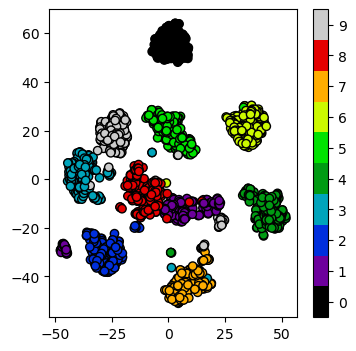

In [3]:
# t-SNE embedding
tsne = manifold.TSNE(n_components=2, init='pca',
        random_state = 0)
X_tsne = tsne.fit_transform(X)
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.nipy_spectral,
        edgecolor='k',label=y)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

## t-SNE: conclusions
- output more visually pleasing
- much more computationally expensive
- non-linear!

# Exercises
The above example has considered only two dimensions since humans can visualize two dimensions very well. However, there can be cases where a dataset requires more than two dimensions to be appropriately decomposed. Modify the above programs to use three dimensions and create appropriate plots. Do three dimensions allow one to better distinguish between the digits?

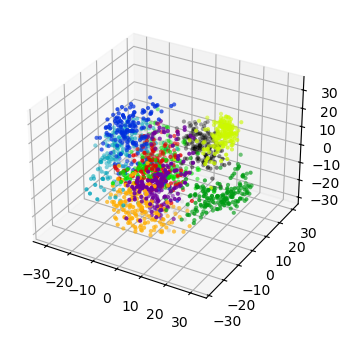

In [4]:
from mpl_toolkits.mplot3d import Axes3D
# PCA
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y,
          cmap=plt.cm.nipy_spectral, s=9, lw=0)
plt.show()


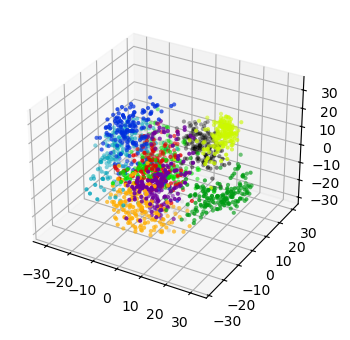

In [5]:
from mpl_toolkits.mplot3d import Axes3D
# PCA
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
fig = plt.figure(1, figsize=(4, 4))
plt.clf()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y,
          cmap=plt.cm.nipy_spectral, s=9, lw=0)
plt.show()


Look up parameters that can be changed in PCA and t-SNE, and experiment with these. How do they change your resulting plots? Might the choice of parameters lead you to make different conclusions about your data?